# Volatility Forecasting Using the GARCH Model

Volatility is formally defined as the degree of variation of a trading price series over time as measured by the **standard deviation** of **logarithmic returns** [**[1]**](https://en.wikipedia.org/wiki/Volatility). Its  estimation is arguably one of the most important topics in finance, for volatility is a key feature for measuring the risk underlying many investment decisions.

## Generalized Autoregressive Conditional Heteroskedasticity

The **Generalized Autoregressive Conditional Heteroskedasticity**, **GARCH**, model is an extention of the **Autoregressive Conditional Heteroskedasticity**, **ARCH**, model that accounts for a moving average component together with the autoregressive component.

As such, the model introduces a new parameter "$p$" that describes the number of lag variance terms:

- $p$: The number of lag variances to include in the GARCH model.
- $q$: The number of lag residual errors to include in the GARCH model.

Formulated in the 1980s, the GARCH model is mainly used to estimate the volatility of returns for stocks, bonds and market indices. 

The GARCH$(p, q)$ model, where $p$ is the order of the GARCH terms $\sigma^{2}$ and $q$ is the order of the ARCH terms $\epsilon^{2}$, is given by,

$$\sigma _{t}^{2} = \alpha_0 +\sum _{i=1}^{q}\alpha _{i}\epsilon _{t-i}^{2}+\sum _{i=1}^{p}\beta _{i}\sigma _{t-i}^{2}$$

where, $\epsilon_t = \sigma_t \omega_t$, and $\omega_t$ is a strong white noise process [**[2]**](https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity).

The GARCH$(1, 1)$ model is thus,

$$\sigma _{t}^{2} = \alpha_0 + \alpha _{1}\epsilon _{t-1}^{2}+ \beta _{1}\sigma _{t-1}^{2}$$

and below is a simulation of the GARCH$(1, 1)$ process, for variance $\sigma _{t}^{2}$,

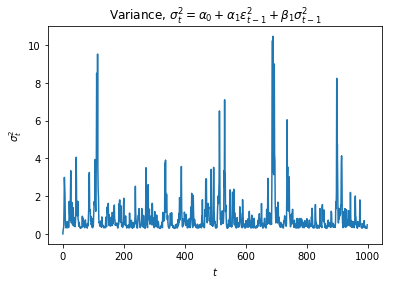

In [1]:
# Scientific libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

# Parameters
alpha = np.array([0.2, 0.5])
beta = np.array([0.3])
w = np.random.normal(0, 1, 1000)
epsilon = np.zeros_like(w)
variance = np.zeros_like(w)

# GARCH(1, 1)
for t in range(1, 1000):
    variance[t] = alpha[0] + alpha[1]*epsilon[t-1]**2 + beta*variance[t-1]
    epsilon[t] = w[t] * np.sqrt(variance[t])

# Visualization
plt.plot(variance)
plt.xlabel(r'$t$')
plt.ylabel(r'$\sigma^2_t$')
plt.title(r'Variance, $\sigma _{t}^{2} = \alpha_0 + \alpha _{1}\epsilon _{t-1}^{2}+ \beta _{1}\sigma _{t-1}^{2}$')
plt.show()

for time series, $\epsilon_t$,

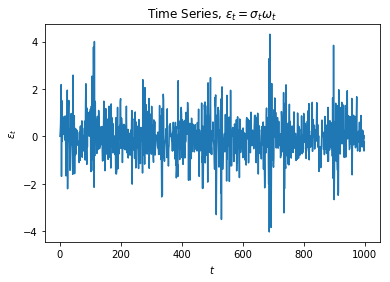

In [2]:
# Visualization
plt.plot(epsilon)
plt.xlabel(r'$t$')
plt.ylabel(r'$\epsilon_t$')
plt.title(r'Time Series, $\epsilon_t = \sigma_t \omega_t$')
plt.show()

## Data Preparation 

The data used for the prediction task is NASDAQ's historical data which covers the period from 21th August, 2016 to 21th August, 2019 having a total number of 753 observations [**[2]**](https://finance.yahoo.com/quote/%5EIXIC/history?p=%5EIXIC).

In [3]:
import pandas as pd

NASDAQ = pd.read_csv("^IXIC.csv")

NASDAQ

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-22,5231.459961,5252.129883,5224.629883,5244.600098,5244.600098,1560210000
1,2016-08-23,5265.779785,5275.740234,5257.899902,5260.080078,5260.080078,1547050000
2,2016-08-24,5254.419922,5262.990234,5205.640137,5217.689941,5217.689941,1714780000
3,2016-08-25,5207.609863,5230.589844,5201.640137,5212.200195,5212.200195,1511890000
4,2016-08-26,5219.049805,5253.390137,5191.859863,5218.919922,5218.919922,1591060000
5,2016-08-29,5223.799805,5245.120117,5222.339844,5232.330078,5232.330078,1416640000
6,2016-08-30,5229.879883,5241.620117,5205.609863,5222.990234,5222.990234,1561020000
7,2016-08-31,5216.419922,5219.890137,5191.180176,5213.220215,5213.220215,1761770000
8,2016-09-01,5218.279785,5229.939941,5189.359863,5227.209961,5227.209961,1592520000
9,2016-09-02,5249.660156,5263.390137,5231.020020,5249.899902,5249.899902,1474200000


## Statistical Analysis

The plot below depicts the original pattern of the time series.

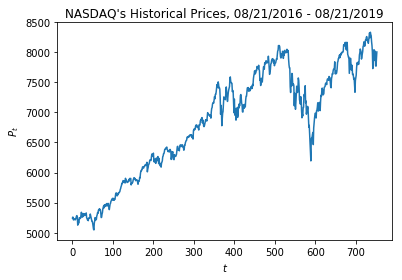

In [4]:
plt.plot(NASDAQ["Close"])
plt.xlabel(r'$t$')
plt.ylabel(r'$P_t$')
plt.title("NASDAQ's Historical Prices, 08/21/2016 - 08/21/2019")
plt.show()

The **logarithmic returns**, $R_t = \frac{\log P_{t + 1}}{P_t} = \log P_{t + 1} - \log P_t$, of our time series is,

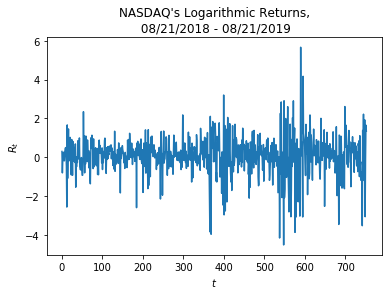

In [5]:
# Logarithmic returns
LogReturns = np.log(NASDAQ["Close"]).diff()*100

plt.plot(LogReturns)
plt.xlabel(r'$t$')
plt.ylabel(r'$R_t$')
plt.title("NASDAQ's Logarithmic Returns,\n 08/21/2018 - 08/21/2019")
plt.show()

it is assumed that the logarithmic returns follow a normal distribution with mean, $\mu$, and variance, $\sigma^2$. The probability density function of a normally distributed variable, $X \sim {\mathcal {N}}(\mu ,\sigma ^{2})$, is thus, $f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\mathrm{e}^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$.

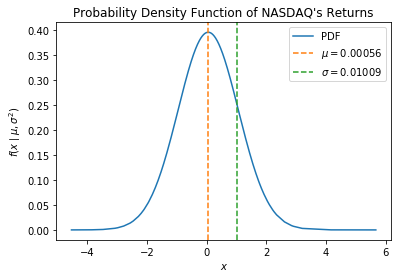

In [6]:
# Normal distribution
def NormalDistribution(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

# Parameters
x = np.sort(LogReturns)
mu = np.mean(LogReturns)
sigma = np.std(LogReturns)

plt.plot(x, NormalDistribution(x, mu, sigma), label =r'PDF')
np.warnings.filterwarnings('ignore')
plt.axvline(mu, linestyle='--', color='C1', label = r'$\mu = 0.00056$')
plt.axvline(sigma, linestyle='--', color='C2', label = r'$\sigma = 0.01009$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x\mid \mu ,\sigma ^{2})$')
plt.title("Probability Density Function of NASDAQ's Returns")
plt.legend()
plt.show()

the rolling standard deviation of NASDAQ logarithmic returns is then,

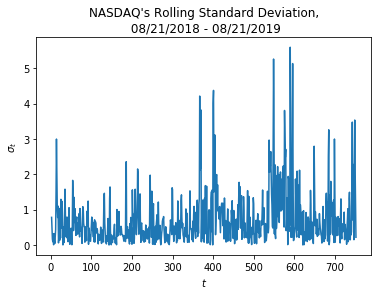

In [7]:
plt.plot(LogReturns.rolling(2).std())
plt.xlabel(r'$t$')
plt.ylabel(r'$\sigma_t$')
plt.title("NASDAQ's Rolling Standard Deviation,\n 08/21/2018 - 08/21/2019")
plt.show()

analyzing NASDAQ's logarithmic returns and its rolling standard deviation plot, it looks clear that the latter is similar to a GARCH$(1, 1)$ process, in the next section of the notebook we will forecast the volatility of NASDAQ's logarithmic returns using the GARCH$(1, 1)$ model.

## Volatility Forecasting Using the GARCH(1, 1) Model

For our volatility forecasting task we will use, as the title of the section indicates, the GARCH$(1, 1)$ model to predict the volatility of NASDAQ's logarithmic returns.
<br>
We use the 'arch' library to achieve the aformantioned task [**[3]**](https://arch.readthedocs.io/en/latest/univariate/introduction.html),

In [8]:
from arch import arch_model

GARCH = arch_model(LogReturns[1:], p=1, q=1)

res = GARCH.fit(update_freq=10)

print(res.summary())

Iteration:     10,   Func. Count:     72,   Neg. LLF: 974.0978494203011
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 974.0978480974105
            Iterations: 11
            Function evaluations: 78
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -974.098
Distribution:                  Normal   AIC:                           1956.20
Method:            Maximum Likelihood   BIC:                           1974.69
                                        No. Observations:                  752
Date:                Wed, Aug 21 2019   Df Residuals:                      748
Time:                        21:20:18   Df Model:                            4
       

the above table showcases GARCH(1,1) model results.

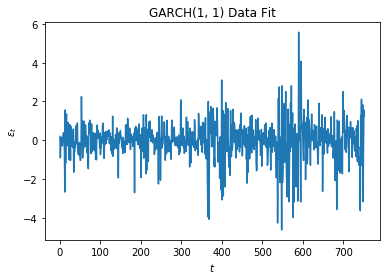

In [9]:
plt.plot(res.resid)
plt.xlabel(r'$t$')
plt.ylabel(r'$\epsilon_t$')
plt.title(r'GARCH(1, 1) Data Fit')
plt.show()

Let's now forecast the volatility of the NASDAQ stock exchange.

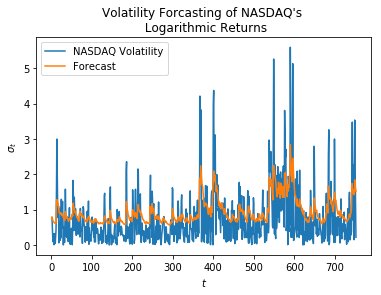

In [10]:
# GARCH(1, 1) forcast
GARCHForecast = res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + res.conditional_volatility**2 * res.params['beta[1]']

plt.plot(LogReturns.rolling(2).std(), label="NASDAQ Volatility")
plt.plot(np.sqrt(GARCHForecast), label="Forecast")
plt.xlabel(r'$t$')
plt.ylabel(r'$\sigma_t$')
plt.title("Volatility Forcasting of NASDAQ's \n Logarithmic Returns")
plt.legend()
plt.show()

In our case study, we used the GARCH$(1, 1)$ model to forecast the volatility of NASDAQ's logarithmic stock returns. GARCH$(1, 1)$ is but one type of models amongst the GARCH family, a tuning of the model's parameters and an application of various types of the GARCH family might lead to different results and perhaps better ones.

## Bibliography

- **[1]** https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity
- **[2]** https://finance.yahoo.com/quote/%5EIXIC/history?p=%5EIXIC
- **[3]** https://arch.readthedocs.io/en/latest/univariate/introduction.html